# BAREC



In [ ]:
from datasets import load_dataset
# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("CAMeL-Lab/BAREC-Corpus-v1.0")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.9M [00:00<?, ?B/s]

data/dev-00000-of-00001.parquet:   0%|          | 0.00/2.37M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/2.51M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/54845 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/7310 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7286 [00:00<?, ? examples/s]

In [ ]:
import pandas as pd

train_df = ds['train'].to_pandas()
dev_df = ds['dev'].to_pandas()
test_df = ds['test'].to_pandas()

BAREC_df = pd.concat([train_df, dev_df, test_df], ignore_index=True)
pd.set_option('display.max_colwidth', None)
BAREC_df.head()

,ID,Sentence,Word_Count,Word,Lex,D3Tok,D3Lex,Readability_Level,Readability_Level_19,Readability_Level_7,Readability_Level_5,Readability_Level_3,Annotator,Document,Source,Book,Author,Domain,Text_Class
0,10100290001,مجلة كل الأولاد وكل البنات,5,مجلة كل الأولاد وكل البنات,مجلة كل ولد كل بنت,مجلة كل ال+ أولاد و+ كل ال+ بنات,مجلة كل ال+ ولد و+ كل ال+ بنت,7-zay,7,2,1,1,A2,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
1,10100290002,ماجد,1,ماجد,ماجد,ماجد,ماجد,1-alif,1,1,1,1,A2,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
2,10100290003,الأربعاء 21 يناير 1987,4,الأربعاء 21 يناير 1987,أربعاء 21 يناير 1987,ال+ أربعاء 21 يناير 1987,ال+ أربعاء 21 يناير 1987,8-Ha,8,3,2,1,A3,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
3,10100290004,الموافق 21 جمادى الأول 1407هــ,6,الموافق 21 جمادى الأول 1407ه,موافق 21 جمادى أول 1407 ه,ال+ موافق 21 جمادى ال+ أول 1407 ه,ال+ موافق 21 جمادى ال+ أول 1407 ه,7-zay,7,2,1,1,A3,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational
4,10100290005,السنة الثامنة,2,السنة الثامنة,سنة ثامن,ال+ سنة ال+ ثامنة,ال+ سنة ال+ ثامن,5-ha,5,2,1,1,A4,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational


In [ ]:
samples_per_level = BAREC_df["Readability_Level_7"].value_counts().sort_index()
print("Number of samples in each 7-level readability:")
print(samples_per_level)

Number of samples in each 7-level readability:
Readability_Level_7
1     3059
2    10415
3     7706
4    14677
5    18510
6    13234
7     1840
Name: count, dtype: int64


In [ ]:
BAREC_df['Dataset_Source'] = 'BAREC'

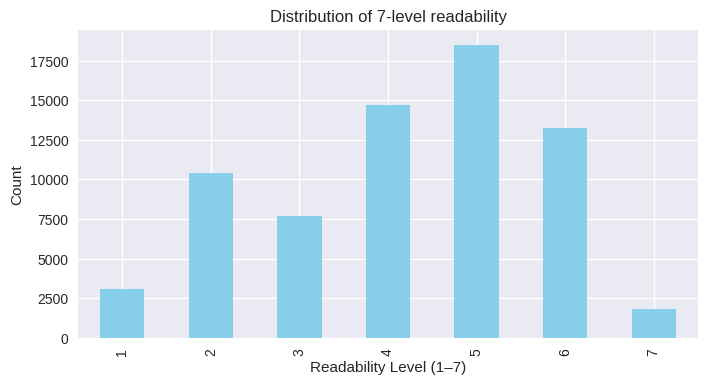

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

BAREC_df["Readability_Level_7"].value_counts().sort_index().plot(
    kind="bar", figsize=(8,4), color="skyblue"
)
plt.title("Distribution of 7-level readability")
plt.xlabel("Readability Level (1–7)")
plt.ylabel("Count")
plt.show()

# DARES

In [ ]:
DARES_df = pd.read_csv('/content/DaresTokenized.csv')
DARES_df.head()

,Word,Fine-grained,Coarse-grained,Arabic_Filename,Sentence,num_sent,ID,Len,Document,Sent_Num,...,Book,Word_Count,Source,Author,Readability_Level_7,Domain,Dataset_Source,Lex,D3Tok,D3Lex
0,"باستثناء كلمة الرقم , النص جيد . غير كلمة تتشكل إلى تشكل وأضف كلمة و بعد كلمة الماء . الجملة النهائية يمكن تعديلها لتكون أكثر وضوحا . قد تكون النسخة المعدلة كالتالي ثم يعرف الماء في الحالة الغازية ب اسم بخار الماء , وعلى الرغم من حضوره في الهواء الذي يحيط بنا , لا نستطيع رؤية بخار الماء .",G3,EE,العلوم,باستثناء كلمة الرقم، النص جيد. غير كلمة تتشكل إلى تشكل وأضف كلمة و بعد كلمة الماء. الجملة النهائية يمكن تعديلها لتكون أكثر وضوحا. قد تكون النسخة المعدلة كالتالي ثم يعرف الماء في الحالة الغازية ب اسم بخار الماء، وعلى الرغم من حضوره في الهواء الذي يحيط بنا، لا نستطيع رؤية بخار الماء.,NaN,482,6,Science_G3_3.txt,4,...,Science,52,Saudi school curriculums,#,3,Other,DARES,"ٱستثناء كلمة رقم , نص جيد . غير كلمة تشكل إلى تشكل اضف كلمة و بعد كلمة ماء . جملة نهائي أمكن تعديل كان أكثر وضوح . قد كان نسخة معدل تألي ثم عرف ماء في حالة غازي ب ٱسم بخار ماء , على رغم من حضور في هواء الذي أحاط ب , لا ٱستطاع رؤية بخار ماء .","ب+ استثناء كلمة ال+ رقم , ال+ نص جيد . غير كلمة تتشكل إلى تشكل و+ NOAN كلمة و بعد كلمة ال+ ماء . ال+ جملة ال+ نهائية يمكن تعديل +ها ل+ تكون أكثر وضوحا . قد تكون ال+ نسخة ال+ معدلة ك+ ال+ تألي ثم يعرف ال+ ماء في ال+ حالة ال+ غازية ب اسم بخار ال+ ماء , و+ على ال+ رغم من حضور +ه في ال+ هواء الذي يحيط ب +نا , لا نستطيع رؤية بخار ال+ ماء .","ب+ ٱستثناء كلمة ال+ رقم , ال+ نص جيد . غير كلمة تشكل إلى تشكل و+ اضف كلمة و بعد كلمة ال+ ماء . ال+ جملة ال+ نهائي أمكن تعديل +ها ل+ كان أكثر وضوح . قد كان ال+ نسخة ال+ معدل ك+ ال+ تألي ثم عرف ال+ ماء في ال+ حالة ال+ غازي ب ٱسم بخار ال+ ماء , و+ على ال+ رغم من حضور +ه في ال+ هواء الذي أحاط ب +نا , لا ٱستطاع رؤية بخار ال+ ماء ."
1,"الفيضان هو أحد أنواع الكوارث الطبيعية . يحدث الفيضان عندما تغمر المياه الأرض نتيجة للأمطار الغزيرة والعواصف . وتؤدي الفيضانات إلى انهيار التربة والنباتات , وفقدان الحيوانات . أما الجفاف فهو عكس الفيضان , ويحدث عند انقطاع الأمطار لفترة طويلة , فتجف الأنهار والبحيرات وتتشقق الأرض . يؤدي الجفاف إلى موت المخلوقات الحية لأنها تحتاج الماء للبقاء على قيد الحياة .",G3,EE,العلوم,الفيضان هو أحد أنواع الكوارث الطبيعية. يحدث الفيضان عندما تغمر المياه الأرض نتيجة للأمطار الغزيرة والعواصف. وتؤدي الفيضانات إلى انهيار التربة والنباتات، وفقدان الحيوانات. أما الجفاف فهو عكس الفيضان، ويحدث عند انقطاع الأمطار لفترة طويلة، فتجف الأنهار والبحيرات وتتشقق الأرض. يؤدي الجفاف إلى موت المخلوقات الحية لأنها تحتاج الماء للبقاء على قيد الحياة.,NaN,549,7,Science_G3.txt,5,...,Science,53,Saudi school curriculums,#,3,Other,DARES,"فيضان هو أحد نوع كارثة طبيعي . حدث فيضان عندم غمر ماء أرض نتيجة مطر غزير عاصفة . أدى فيضان إلى ٱنهيار تربة نبات , فقدان حيوان . أما جفاف هو عكس فيضان , أحدث عند ٱنقطاع مطر فترة طويل , جف نهر بحيرة تشقق أرض . أدى جفاف إلى موت مخلوق حي أن ٱحتاج ماء بقاء على قيد حياة .","ال+ فيضان هو أحد أنواع ال+ كوارث ال+ طبيعية . يحدث ال+ فيضان عندما تغمر ال+ مياه ال+ أرض نتيجة ل+ ال+ أمطار ال+ غزيرة و+ ال+ عواصف . و+ تؤدي ال+ فيضانات إلى انهيار ال+ تربة و+ ال+ نباتات , و+ فقدان ال+ حيوانات . أما ال+ جفاف ف+ هو عكس ال+ فيضان , و+ يحدث عند انقطاع ال+ أمطار ل+ فترة طويلة , ف+ تجف ال+ أنهار و+ ال+ بحيرات و+ تتشقق ال+ أرض . يؤدي ال+ جفاف إلى موت ال+ مخلوقات ال+ حية ل+ أن +ها تحتاج ال+ ماء ل+ ال+ بقاء على قيد ال+ حياة .","ال+ فيضان هو أحد نوع ال+ كارثة ال+ طبيعي . حدث ال+ فيضان عندم غمر ال+ ماء ال+ أرض نتيجة ل+ ال+ مطر ال+ غزير و+ ال+ عاصفة . و+ أدى ال+ فيضان إلى ٱنهيار ال+ تربة و+ ال+ نبات , و+ فقدان ال+ حيوان . أما ال+ جفاف ف+ هو عكس ال+ فيضان , و+ أحدث عند ٱنقطاع ال+ مطر ل+ فترة طويل , ف+ جف ال+ نهر و+ ال+ بحيرة و+ تشقق ال+ أرض . أدى ال+ جفاف إلى موت ال+ مخلوق ال+ حي ل+ أن +ها ٱحتاج ال+ ماء ل+ ال+ بقاء على قيد ال+ حياة ."
2,"نظرا لمرور الهواء الرطب من فوق البحر نحو الجبال , يطرأ ارتفاع في طول الساحل ويتم دفع الهواء إلى الأعلى بقوة من قبل الجبال . يتسبب التعريض لأشعة الشمس الشديدة في ارتفاع الهواء الرطب وتكوين المزيد من السحب . ونتيجة لذلك , تمطر أو تثلج وتزيد من نسبة الرطوبة على جهة الجبال المطلة على البحر .",G3

In [ ]:
# Convert to integer type
columns_to_convert = ['ID', 'Len', 'Sent_Num', 'Sent_Len']

for col in columns_to_convert:
    DARES_df[col] = DARES_df[col].astype('Int64')

print(DARES_df[columns_to_convert].dtypes)

ID          Int64
Len         Int64
Sent_Num    Int64
Sent_Len    Int64
dtype: object


In [ ]:
DARES_GRADE_TO_BAREC = {"G3": 3}
DARES_df['Source'] = 'Saudi school curriculums'
DARES_df['Author'] = '#'

In [ ]:
# Process DARES Data (Mapping)
DARES_df['Readability_Level_7'] = (
    DARES_df['Fine-grained'].map(DARES_GRADE_TO_BAREC)
)

In [ ]:
def map_dares_domain(subject):
    subject = str(subject).strip().replace('_', ' ')
    if subject in ['Science', 'Biology', 'Physics', 'Chemistry', 'Math', 'Digital Skills', 'AI', 'IoT', 'Data Science', 'Tech', 'Computer Sci', 'Geology', 'Software Eng', 'Ecology']:
        return 'STEM'
    elif subject in ['Islamic Studies', 'ArabicLanguage', 'Arabic Language', 'Artistic Education', 'Arts', 'Hadith', 'Quran Sciences']:
        return 'Arts & Humanities'
    elif subject in ['Sociology', 'History', 'Health', 'Life&Family Skills', 'Islamic', 'Critical Thinking', 'Management', 'Geography', 'Business', 'Decision Making', 'Finance', 'Athletics', 'Psychology', 'Research Skills', 'Law', 'Professional Skills', 'Economics', 'Life Skills']:
        return 'Social Sciences'
    return 'Other'

In [ ]:
DARES_df = DARES_df.rename(columns={
    'English_Filename': 'Book', "Text":"Sentence", "Filename":"Document"
})

DARES_df['Domain'] = DARES_df['Source'].apply(map_dares_domain)
DARES_df['Dataset_Source'] = 'DARES'

In [ ]:
DARES_df.head(10)

,Word,Fine-grained,Coarse-grained,Arabic_Filename,Sentence,num_sent,ID,Len,Document,Sent_Num,...,Book,Word_Count,Source,Author,Readability_Level_7,Domain,Dataset_Source,Lex,D3Tok,D3Lex
0,"باستثناء كلمة الرقم , النص جيد . غير كلمة تتشكل إلى تشكل وأضف كلمة و بعد كلمة الماء . الجملة النهائية يمكن تعديلها لتكون أكثر وضوحا . قد تكون النسخة المعدلة كالتالي ثم يعرف الماء في الحالة الغازية ب اسم بخار الماء , وعلى الرغم من حضوره في الهواء الذي يحيط بنا , لا نستطيع رؤية بخار الماء .",G3,EE,العلوم,باستثناء كلمة الرقم، النص جيد. غير كلمة تتشكل إلى تشكل وأضف كلمة و بعد كلمة الماء. الجملة النهائية يمكن تعديلها لتكون أكثر وضوحا. قد تكون النسخة المعدلة كالتالي ثم يعرف الماء في الحالة الغازية ب اسم بخار الماء، وعلى الرغم من حضوره في الهواء الذي يحيط بنا، لا نستطيع رؤية بخار الماء.,NaN,482,6,Science_G3_3.txt,4,...,Science,52,Saudi school curriculums,#,3,Other,DARES,"ٱستثناء كلمة رقم , نص جيد . غير كلمة تشكل إلى تشكل اضف كلمة و بعد كلمة ماء . جملة نهائي أمكن تعديل كان أكثر وضوح . قد كان نسخة معدل تألي ثم عرف ماء في حالة غازي ب ٱسم بخار ماء , على رغم من حضور في هواء الذي أحاط ب , لا ٱستطاع رؤية بخار ماء .","ب+ استثناء كلمة ال+ رقم , ال+ نص جيد . غير كلمة تتشكل إلى تشكل و+ NOAN كلمة و بعد كلمة ال+ ماء . ال+ جملة ال+ نهائية يمكن تعديل +ها ل+ تكون أكثر وضوحا . قد تكون ال+ نسخة ال+ معدلة ك+ ال+ تألي ثم يعرف ال+ ماء في ال+ حالة ال+ غازية ب اسم بخار ال+ ماء , و+ على ال+ رغم من حضور +ه في ال+ هواء الذي يحيط ب +نا , لا نستطيع رؤية بخار ال+ ماء .","ب+ ٱستثناء كلمة ال+ رقم , ال+ نص جيد . غير كلمة تشكل إلى تشكل و+ اضف كلمة و بعد كلمة ال+ ماء . ال+ جملة ال+ نهائي أمكن تعديل +ها ل+ كان أكثر وضوح . قد كان ال+ نسخة ال+ معدل ك+ ال+ تألي ثم عرف ال+ ماء في ال+ حالة ال+ غازي ب ٱسم بخار ال+ ماء , و+ على ال+ رغم من حضور +ه في ال+ هواء الذي أحاط ب +نا , لا ٱستطاع رؤية بخار ال+ ماء ."
1,"الفيضان هو أحد أنواع الكوارث الطبيعية . يحدث الفيضان عندما تغمر المياه الأرض نتيجة للأمطار الغزيرة والعواصف . وتؤدي الفيضانات إلى انهيار التربة والنباتات , وفقدان الحيوانات . أما الجفاف فهو عكس الفيضان , ويحدث عند انقطاع الأمطار لفترة طويلة , فتجف الأنهار والبحيرات وتتشقق الأرض . يؤدي الجفاف إلى موت المخلوقات الحية لأنها تحتاج الماء للبقاء على قيد الحياة .",G3,EE,العلوم,الفيضان هو أحد أنواع الكوارث الطبيعية. يحدث الفيضان عندما تغمر المياه الأرض نتيجة للأمطار الغزيرة والعواصف. وتؤدي الفيضانات إلى انهيار التربة والنباتات، وفقدان الحيوانات. أما الجفاف فهو عكس الفيضان، ويحدث عند انقطاع الأمطار لفترة طويلة، فتجف الأنهار والبحيرات وتتشقق الأرض. يؤدي الجفاف إلى موت المخلوقات الحية لأنها تحتاج الماء للبقاء على قيد الحياة.,NaN,549,7,Science_G3.txt,5,...,Science,53,Saudi school curriculums,#,3,Other,DARES,"فيضان هو أحد نوع كارثة طبيعي . حدث فيضان عندم غمر ماء أرض نتيجة مطر غزير عاصفة . أدى فيضان إلى ٱنهيار تربة نبات , فقدان حيوان . أما جفاف هو عكس فيضان , أحدث عند ٱنقطاع مطر فترة طويل , جف نهر بحيرة تشقق أرض . أدى جفاف إلى موت مخلوق حي أن ٱحتاج ماء بقاء على قيد حياة .","ال+ فيضان هو أحد أنواع ال+ كوارث ال+ طبيعية . يحدث ال+ فيضان عندما تغمر ال+ مياه ال+ أرض نتيجة ل+ ال+ أمطار ال+ غزيرة و+ ال+ عواصف . و+ تؤدي ال+ فيضانات إلى انهيار ال+ تربة و+ ال+ نباتات , و+ فقدان ال+ حيوانات . أما ال+ جفاف ف+ هو عكس ال+ فيضان , و+ يحدث عند انقطاع ال+ أمطار ل+ فترة طويلة , ف+ تجف ال+ أنهار و+ ال+ بحيرات و+ تتشقق ال+ أرض . يؤدي ال+ جفاف إلى موت ال+ مخلوقات ال+ حية ل+ أن +ها تحتاج ال+ ماء ل+ ال+ بقاء على قيد ال+ حياة .","ال+ فيضان هو أحد نوع ال+ كارثة ال+ طبيعي . حدث ال+ فيضان عندم غمر ال+ ماء ال+ أرض نتيجة ل+ ال+ مطر ال+ غزير و+ ال+ عاصفة . و+ أدى ال+ فيضان إلى ٱنهيار ال+ تربة و+ ال+ نبات , و+ فقدان ال+ حيوان . أما ال+ جفاف ف+ هو عكس ال+ فيضان , و+ أحدث عند ٱنقطاع ال+ مطر ل+ فترة طويل , ف+ جف ال+ نهر و+ ال+ بحيرة و+ تشقق ال+ أرض . أدى ال+ جفاف إلى موت ال+ مخلوق ال+ حي ل+ أن +ها ٱحتاج ال+ ماء ل+ ال+ بقاء على قيد ال+ حياة ."
2,"نظرا لمرور الهواء الرطب من فوق البحر نحو الجبال , يطرأ ارتفاع في طول الساحل ويتم دفع الهواء إلى الأعلى بقوة من قبل الجبال . يتسبب التعريض لأشعة الشمس الشديدة في ارتفاع الهواء الرطب وتكوين المزيد من السحب . ونتيجة لذلك , تمطر أو تثلج وتزيد من نسبة الرطوبة على جهة الجبال المطلة على البحر .",G3

# Combine BAREC + DARES

In [ ]:
df = pd.concat([BAREC_df, DARES_df], ignore_index=True)

Number of samples in each 7-level readability:
Readability_Level_7
1     3059
2    10415
3     8043
4    14677
5    18510
6    13234
7     1840
Name: count, dtype: int64


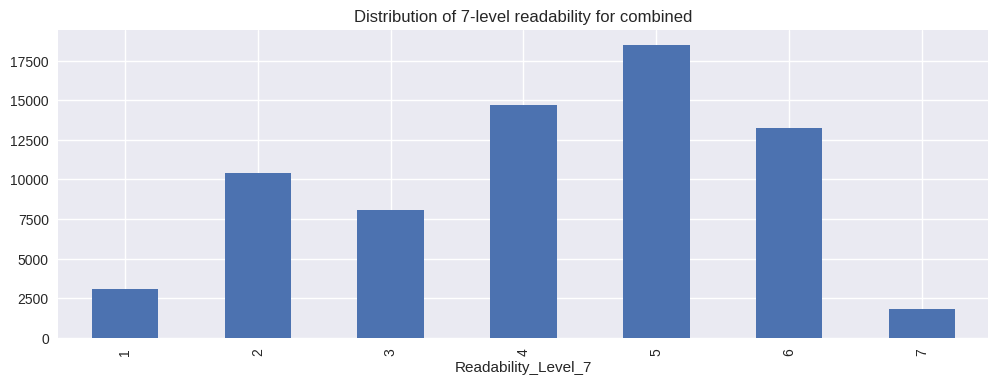

In [ ]:
samples_per_level = df["Readability_Level_7"].value_counts().sort_index()
print("Number of samples in each 7-level readability:")
print(samples_per_level)

df["Readability_Level_7"].value_counts().sort_index().plot(kind="bar", figsize=(12,4))
plt.title("Distribution of 7-level readability for combined")
plt.show()

In [ ]:
total_samples = df.shape[0]

print(f"Total number of samples in the combined dataset: {total_samples}")

Total number of samples in the combined dataset: 69778


Add samples from The Arabic E-Book Corpus

In [ ]:
Level7_df = pd.read_csv('/content/level7.csv')
Level7_df.head()

,ID,Sentence,Word_Count,Word,Lex,D3Tok,D3Lex,Readability_Level,Readability_Level_19,Readability_Level_7,Readability_Level_5,Readability_Level_3,Annotator,Document,Source,Book,Author,Domain,Text_Class
0,63908296_723,(٨) من المجلس الحادي عشر\n\nطلعت يوم السبت ثامن عشرين جمادى الآخرة، وقعدوا في الدهيشة أربعين درجة، وكان الإمام الشيخ شمس الدين السمديسي، وجاء المماليك الصغار وقرءوا قدَّام مولانا السلطان جوقًا بعد جوق، وما وقع البحث في تلك الليلة.,39,"( ٨ ) من المجلس الحادي عشر طلعت يوم السبت ثامن عشرين جمادى الآخرة , وقعدوا في الدهيشة أربعين درجة , وكان الإمام الشيخ شمس الدين السمديسي , وجاء المماليك الصغار وقرءوا قدام مولانا السلطان جوقا بعد جوق , وما وقع البحث في تلك الليلة .","( ٨ ) من مجلس حادي عشرة طلع يوم سبت ثامن عشرون جمادى آخرة , قعد في دهيشة أربع درجة , كان أمام شيخ شمس دين سمديسي , جاء مملوك صغير قرءوا قدام مولى سلطان جوق بعد جوق , ما وقع بحث في ذلك ليلة .","( ٨ ) من ال+ مجلس ال+ حادي عشرة طلع يوم ال+ سبت ثامن عشرون جمادى ال+ آخرة , و+ قعد في ال+ دهيشة أربع درجة , و+ كان ال+ أمام ال+ شيخ شمس ال+ دين ال+ سمديسي , و+ جاء ال+ مملوك ال+ صغير و+ قرءوا قدام مولى +نا ال+ سلطان جوق بعد جوق , و+ ما وقع ال+ بحث في ذلك ال+ ليلة .","( ٨ ) من ال+ مجلس ال+ حادي عشرة طلع يوم ال+ سبت ثامن عشرون جمادى ال+ آخرة , و+ قعد في ال+ دهيشة أربع درجة , و+ كان ال+ أمام ال+ شيخ شمس ال+ دين ال+ سمديسي , و+ جاء ال+ مملوك ال+ صغير و+ قرءوا قدام مولى +نا ال+ سلطان جوق بعد جوق , و+ ما وقع ال+ بحث في ذلك ال+ ليلة .",NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,مجالس السلطان الغوري: صفحات من تاريخ مصر في القرن العاشر الهجري,عبد الوهاب عزام,Arts & Humanities,NaN
1,79072819_736,و«ديوان لبيد بن ربيعة» المتوفى في أول خلافة مُعاوية بعد أن عاش ١٤٠ سنة، وهو مطبوع بمدينة ويانة سنة ١٨٨٠ للميلاد.,21,"و "" ديوان لبيد بن ربيعة "" المتوفى في أول خلافة معاوية بعد أن عاش ١٤٠ سنة , وهو مطبوع بمدينة ويانة سنة ١٨٨٠ للميلاد .","و "" ديوان بيد بن ربيعة "" متوفى في أول خلافة معاوية بعد أن عاش ١٤٠ سنة , هو مطبوع مدينة ويانه سنة ١٨٨٠ ميلاد .","و "" ديوان ل+ بيد بن ربيعة "" ال+ متوفى في أول خلافة معاوية بعد أن عاش ١٤٠ سنة , و+ هو مطبوع ب+ مدينة ويانه سنة ١٨٨٠ ل+ ال+ ميلاد .","و "" ديوان ل+ بيد بن ربيعة "" ال+ متوفى في أول خلافة معاوية بعد أن عاش ١٤٠ سنة , و+ هو مطبوع ب+ مدينة ويانه سنة ١٨٨٠ ل+ ال+ ميلاد .",NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,تاريخ آداب اللغة العربية,محمد دياب,Arts & Humanities,NaN
2,82416046_431,وفي هذه الأثناء أقبل ثلاثة من الفرسان متلثِّمون وعليهم أرْدِيَة حُمْر وسلاح، فترجَّلوا دون الأمير، ثم تقدَّم أحدُهم فقبَّل مواطئَه، فسأله الأمير قائلًا: مَن الرجال؟,25,"وفي هذه الأثناء أقبل ثلاثة من الفرسان متلثمون وعليهم أردية حمر وسلاح , فترجلوا دون الأمير , ثم تقدم أحدهم فقبل مواطئه , فسأله الأمير قائلا : من الرجال ؟","في هذا ثني أقبل ثلاث من فارس متلثم على أردي أحمر سلاح , ترجل دون أمير , ثم تقدم أحد قبل موطأ , سأل أمير قائل : من رجل ؟","و+ في هذا ال+ ثني أقبل ثلاث من ال+ فارس متلثم و+ على +هم أردي أحمر و+ سلاح , ف+ ترجل دون ال+ أمير , ثم تقدم أحد +هم ف+ قبل موطأ +ه , ف+ سأل +ه ال+ أمير قائل : من ال+ رجل ؟","و+ في هذا ال+ ثني أقبل ثلاث من ال+ فارس متلثم و+ على +هم أردي أحمر و+ سلاح , ف+ ترجل دون ال+ أمير , ثم تقدم أحد +هم ف+ قبل موطأ +ه , ف+ سأل +ه ال+ أمير قائل : من ال+ رجل ؟",NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,عذراء الهند,أحمد شوقي,Arts & Humanities,NaN
3,25297192_1012,ويبدو أنهم نجحوا في «لفت انتباهه»، حيث لم يُوجَّه أيُّ اتهامٍ رسمي.,12,"ويبدو أنهم نجحوا في "" لفت انتباهه "" , حيث لم يوجه أي اتهام رسمي .","بدا أن نجح في "" لفت ٱنتباه "" , حيث لم وجه أي ٱتهام رسمي .","و+ بدا أن +هم نجح في "" لفت ٱنتباه +ه "" , حيث لم وجه أي ٱتهام رسمي .","و+ بدا أن +هم نجح في "" لفت ٱنتباه +ه "" , حيث لم وجه أي ٱتهام رسمي .",NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,النفط,أبتون سِنكلير,Arts & Humanities,NaN
4,97305159_334,واختار الملك العقوبة الثانية فنفذت فيها، وفي اليوم التالي تزوج هو من جين سيمور.,14,"واختار الملك العقوبة الثانية فنفذت فيها , وفي اليوم التالي تزوج هو من جين سيمور .","ٱختار ملك عقوبة ثانية نفذ في , في يوم تالي تزوج هو من جين سيمور .","و+ ٱختار ال+ ملك ال+ عقوبة ال+ ثانية ف+ نفذ في +ها , و+ في ال+ يوم ال+ تالي تزوج هو من جين سيمور .","و+ ٱختار ال+ ملك ال+ عقوبة ال+ ثانية ف+ نفذ في +ها , و+ في ال+ يوم

In [ ]:
Level7_df = Level7_df[Level7_df['Readability_Level_7'] == 7]
Level7_df['Dataset_Source'] = 'Arabic E-Book Corpus'
Level7_df['Source'] = 'Arabic E-Books'
df = pd.concat([df, Level7_df], ignore_index=True)

print("\nNumber of samples in each readability level after adding Level 7 samples:")
print(df["Readability_Level_7"].value_counts().sort_index())


Number of samples in each readability level after adding Level 7 samples:
Readability_Level_7
1     3059
2    10415
3     8043
4    14677
5    18510
6    13234
7     8840
Name: count, dtype: int64


In [ ]:
print(f"Total rows in Level7_df after loading: {Level7_df.shape[0]}")

Total rows in Level7_df after loading: 7000


In [ ]:
print(df.columns.tolist())

['ID', 'Sentence', 'Word_Count', 'Word', 'Lex', 'D3Tok', 'D3Lex', 'Readability_Level', 'Readability_Level_19', 'Readability_Level_7', 'Readability_Level_5', 'Readability_Level_3', 'Annotator', 'Document', 'Source', 'Book', 'Author', 'Domain', 'Text_Class', 'Dataset_Source', 'Fine-grained', 'Coarse-grained', 'Arabic_Filename', 'num_sent', 'Len', 'Sent_Num', 'Sent_Len']


In [ ]:
columns_to_drop = ['Readability_Level', 'Readability_Level_19', 'Readability_Level_5', 'Readability_Level_3', 'Annotator','Fine-grained', 'Coarse-grained', 'num_sent', 'Len', 'Sent_Num', 'Sent_Len', 'Arabic_Filename']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.rename(columns={'Readability_Level_7': 'Readability_Level'}, inplace=True)

print("Columns after deletion:")
print(df.columns)

Columns after deletion:
Index(['ID', 'Sentence', 'Word_Count', 'Word', 'Lex', 'D3Tok', 'D3Lex',
       'Readability_Level', 'Document', 'Source', 'Book', 'Author', 'Domain',
       'Text_Class', 'Dataset_Source'],
      dtype='object')


In [ ]:
df = df[df['Readability_Level'] != 1].copy()

print("\nNumber of samples in each readability level after removing Level 1 samples:")
print(df["Readability_Level"].value_counts().sort_index())


Number of samples in each readability level after removing Level 1 samples:
Readability_Level
2    10415
3     8043
4    14677
5    18510
6    13234
7     8840
Name: count, dtype: int64


In [ ]:
# Define the mapping from old levels to new levels
level_mapping = { 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6 }
df['Readability_Level'] = df['Readability_Level'].map(level_mapping)

Number of samples in each readability level:
Readability_Level
1    10415
2     8043
3    14677
4    18510
5    13234
6     8840
Name: count, dtype: int64


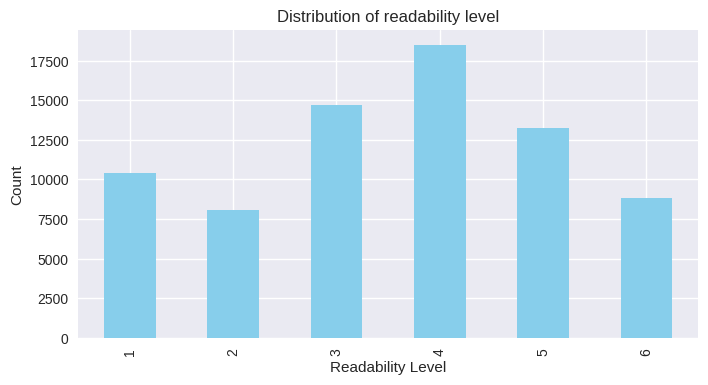

In [ ]:
samples_per_level = df["Readability_Level"].value_counts().sort_index()
print("Number of samples in each readability level:")
print(samples_per_level)

samples_per_level.plot(
    kind="bar", figsize=(8,4), color="skyblue"
)
plt.title("Distribution of readability level")
plt.xlabel("Readability Level")
plt.ylabel("Count")
plt.show()

In [ ]:
df = df.drop_duplicates(subset=["Sentence"])

print("Shape of the DataFrame after removing duplicate sentences:")
print(df.shape)

print("\nNumber of samples in each readability level after removing duplicate sentences:")
print(df["Readability_Level"].value_counts().sort_index())

Shape of the DataFrame after removing duplicate sentences:
(71044, 15)

Number of samples in each readability level after removing duplicate sentences:
Readability_Level
1     9027
2     7735
3    14369
4    17973
5    13109
6     8831
Name: count, dtype: int64


In [ ]:
import re

arabic_chars = re.compile(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDCF\uFDF0-\uFDFF\uFE70-\uFEFF\u0020-\u002F\u0030-\u0039\u003A-\u0040\u005B-\u0060\u007B-\u007E\u00A0-\u00BF\u2000-\u206F\u2E00-\u2E7F\u3000-\u303F\uFE30-\uFE4F]+')

def find_non_arabic_chars(text):
    non_arabic = []
    for char in text:
        if not arabic_chars.fullmatch(char):
             non_arabic.append(char)
    return non_arabic

non_arabic_characters_found = set()

for sentence in df["Sentence"]:
    for word in str(sentence).split():
        non_arabic_chars_in_word = find_non_arabic_chars(word)
        if non_arabic_chars_in_word:
            non_arabic_characters_found.update(non_arabic_chars_in_word)

if non_arabic_characters_found:
    print("Non-Arabic characters found:")
    print(non_arabic_characters_found)
else:
    print("No non-standard Arabic or common punctuation characters found.")

count_sentences_with_non_arabic = 0

for sentence in df["Sentence"]:
    has_non_arabic = False
    for char in str(sentence):
        if char in non_arabic_characters_found:
            has_non_arabic = True
            break
    if has_non_arabic:
        count_sentences_with_non_arabic += 1

print(f"Number of sentences containing non-Arabic characters: {count_sentences_with_non_arabic}")

Non-Arabic characters found:
{'γ', 'ս', 'д', '�', '\uf06d', 'i', '▫', 'w', 'L', 'ע', 'ⲥ', 'n', '✔', 'ū', 'ⵏ', 'ա', 'ό', 'у', 'η', 'ά', 'λ', 'h', 'Q', 'ä', 'ⵔ', 'í', '丝', 'à', 'S', 'ⵎ', 'ⵖ', 'W', 'ш', 's', 'Γ', 'N', 'מ', 'ϱ', 'ς', 'á', 'ɐ', 'è', 'D', 'ⵍ', 'ɵ', 'J', 'ⲡ', 'I', 'Э', 'l', 'y', 'X', '湾', 'Z', 'ж', '\uf076', 'и', '÷', 'В', 'z', '中', 'И', 'й', 'β', 'ⲟ', 'π', 'e', 'O', 'п', 'ʃ', 'ւ', 'ç', 'ː', 'פ', 'H', 'ü', 'σ', '日', 'ⲕ', 'ɑ', 'm', 'ї', 'C', '\uf0fb', 't', 'ר', '路', 'с', '臺', 'អ', 'ϰ', 'ь', 'ង', '丸', 'M', 'ē', 'р', 'o', 'ओ', 'u', 'т', 'ⴳ', 'E', 'я', 'י', 'Y', 'ö', '×', 'е', '√', 'ˈ', 'ត', 'л', 'ն', 'U', '台', 'г', '旗', 'Ş', 'Μ', '華', 'ή', 'ἐ', '□', 'յ', 'Χ', 'F', 'ɾ', 'μ', 'ի', 'k', 'ḗ', 'b', 'ε', 'Հ', 'υ', 'B', 'Б', 'Β', 'ե', '́', '⁹', 'Р', 'ⵜ', 'χ', 'ἀ', 'э', 'έ', '章', 'կ', 'թ', '國', '−', 'ր', 'о', 'ɔ', 'c', 'ñ', 'ο', 'r', 'P', '⁸', 'g', 'х', 'v', 'æ', 'כ', '絲', 'ⲓ', 'н', 'の', 'ы', 'ῆ', 'j', 'ⵉ', 'а', '綢', 'T', 'ι', 'ⲭ', 'ऀ', 'ō', '绸', '✘', 'ү', '华', 'ᵻ', 'x', 'φ', 'p', '✓', 

In [ ]:
# Remove non arabic chars
arabic_chars_only = re.compile(r'[^[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDCF\uFDF0-\uFDFF\uFE70-\uFEFF]]+')

def remove_non_arabic(text):
    if isinstance(text, str):
        return arabic_chars_only.sub('', text)
    return text

df.loc[:, "Sentence"] = df["Sentence"].apply(remove_non_arabic)

In [ ]:
df.head()

,ID,Sentence,Word_Count,Word,Lex,D3Tok,D3Lex,Readability_Level,Document,Source,Book,Author,Domain,Text_Class,Dataset_Source
0,10100290001,مجلة كل الأولاد وكل البنات,5,مجلة كل الأولاد وكل البنات,مجلة كل ولد كل بنت,مجلة كل ال+ أولاد و+ كل ال+ بنات,مجلة كل ال+ ولد و+ كل ال+ بنت,1,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational,BAREC
2,10100290003,الأربعاء 21 يناير 1987,4,الأربعاء 21 يناير 1987,أربعاء 21 يناير 1987,ال+ أربعاء 21 يناير 1987,ال+ أربعاء 21 يناير 1987,2,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational,BAREC
3,10100290004,الموافق 21 جمادى الأول 1407هــ,6,الموافق 21 جمادى الأول 1407ه,موافق 21 جمادى أول 1407 ه,ال+ موافق 21 جمادى ال+ أول 1407 ه,ال+ موافق 21 جمادى ال+ أول 1407 ه,1,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational,BAREC
4,10100290005,السنة الثامنة,2,السنة الثامنة,سنة ثامن,ال+ سنة ال+ ثامنة,ال+ سنة ال+ ثامن,1,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational,BAREC
5,10100290006,العدد 413,2,العدد 413,عدد 413,ال+ عدد 413,ال+ عدد 413,1,BAREC_Majed_0413_1987_001.txt,Majed,Edition: 413,#,Arts & Humanities,Foundational,BAREC


In [ ]:
print("Number of null/missing values in each column:")
print(df.isnull().sum())

Number of null/missing values in each column:
ID                      0
Sentence                0
Word_Count              0
Word                    0
Lex                     0
D3Tok                   0
D3Lex                   0
Readability_Level       0
Document             6997
Source                  0
Book                    0
Author                  0
Domain                  0
Text_Class           7334
Dataset_Source          0
dtype: int64


In [ ]:
import pandas as pd
from collections import Counter
import numpy as np

print("Original Data:")

try:
    print(f"Total samples: {len(df)}")
    print(f"Original Class Distribution: {Counter(df['Readability_Level'])}")

    MIN_CLASS_SIZE = min(Counter(df['Readability_Level']).values())
    print(f"\nSmallest class size: {MIN_CLASS_SIZE}. Undersampling all classes to this size.")

    sampled_indices = []

    for label in sorted(df['Readability_Level'].unique()):

        class_indices = df[df['Readability_Level'] == label].index

        sampled_indices.extend(
            class_indices.to_series().sample(n=MIN_CLASS_SIZE, random_state=42).tolist()
        )

    balanced_df = df.loc[sampled_indices]

    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


    print("\nFinal Balanced Data:")
    print(f"Total samples after resampling: {len(balanced_df)}")
    print("Final Class Distribution (Resampled):", Counter(balanced_df['Readability_Level']))

    balanced_df.to_csv('bayyin_dataset.csv', index=False, encoding='utf-8-sig')

    print("\nFinal balanced data saved to 'bayyin_dataset.csv'.")

except (NameError, KeyError, ValueError) as e:
    print(f"\nAn error occurred. Please ensure the DataFrame 'df' is loaded correctly.")
    print(f"It must contain a column named 'Readability_Level' and not be empty.")
    print(f"Error details: {e}")

Original Data:
Total samples: 71044
Original Class Distribution: Counter({4: 17973, 3: 14369, 5: 13109, 1: 9027, 6: 8831, 2: 7735})

Smallest class size: 7735. Undersampling all classes to this size.

Final Balanced Data:
Total samples after resampling: 46410
Final Class Distribution (Resampled): Counter({2: 7735, 5: 7735, 3: 7735, 4: 7735, 6: 7735, 1: 7735})

Final balanced data saved to 'bayyin_dataset.csv'.


In [ ]:
import pandas as pd

# Load the balanced dataset
bayyin_df = pd.read_csv('bayyin_dataset.csv')

# Print the number of samples in each readability level
samples_per_level_final = bayyin_df["Readability_Level"].value_counts().sort_index()
print("Number of samples in each readability level (bayyin_dataset.csv):")
print(samples_per_level_final)

Number of samples in each readability level (bayyin_dataset.csv):
Readability_Level
1    7735
2    7735
3    7735
4    7735
5    7735
6    7735
Name: count, dtype: int64
